# Pet Emotion Detection 

In [1]:
import numpy as np
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import shutil

In [2]:
# code to make tensors run on GPU
def set_gpu_device():
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        tf.config.set_visible_devices(physical_devices[0], 'GPU')
        tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Calling the function to set GPU device
set_gpu_device()
if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
else:
    print("No GPU found. TensorFlow will use the CPU.")

GPU is available!


In [4]:
# seting path to the dataset
train_data = pathlib.Path('pet/Data/train/')
test_data = pathlib.Path('pet/Data/test/')
valid_data = pathlib.Path('pet/Data/valid/')


Data Preprocessins:

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# It is used to generate augmented images for training  model.
train_datagen = ImageDataGenerator(
    # rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# batch size and target image size
batch_size = 32
img_size = (224, 224)  


train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical' 
)

valid_generator = test_datagen.flow_from_directory(
    valid_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# creaing a sequential model
model = Sequential()

# adding convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# model head
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(4, activation='softmax'))  

# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
# setting training steps per epoch
steps_per_epoch = train_generator.samples // batch_size
validation_steps = valid_generator.samples // batch_size

# model fitting/ training
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=validation_steps
)

Epoch 1/10
31/31 [==============================] - 10s 280ms/step - loss: 113.2192 - accuracy: 0.2552 - val_loss: 1.3856 - val_accuracy: 0.2188
Epoch 2/10
31/31 [==============================] - 9s 280ms/step - loss: 1.3861 - accuracy: 0.2583 - val_loss: 1.3853 - val_accuracy: 0.2812
Epoch 3/10
31/31 [==============================] - 9s 280ms/step - loss: 1.3773 - accuracy: 0.2624 - val_loss: 1.3841 - val_accuracy: 0.3125
Epoch 4/10
31/31 [==============================] - 9s 280ms/step - loss: 1.3820 - accuracy: 0.2655 - val_loss: 1.3827 - val_accuracy: 0.3438
Epoch 5/10
31/31 [==============================] - 9s 281ms/step - loss: 1.3806 - accuracy: 0.2810 - val_loss: 1.3840 - val_accuracy: 0.3125
Epoch 6/10
31/31 [==============================] - 9s 283ms/step - loss: 1.3946 - accuracy: 0.2696 - val_loss: 1.3814 - val_accuracy: 0.3438
Epoch 7/10
31/31 [==============================] - 9s 282ms/step - loss: 1.3745 - accuracy: 0.2758 - val_loss: 1.3795 - val_accuracy: 0.3125
Epo

In [18]:
# model evaluation on test sets
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("Test accuracy:", test_acc)


2/2 - 0s - loss: 1.3731 - accuracy: 0.3421 - 102ms/epoch - 51ms/step
Test accuracy: 0.34210526943206787


In [19]:
# making predictions
predictions = model.predict(test_generator)


2/2 [==============================] - 0s 19ms/step


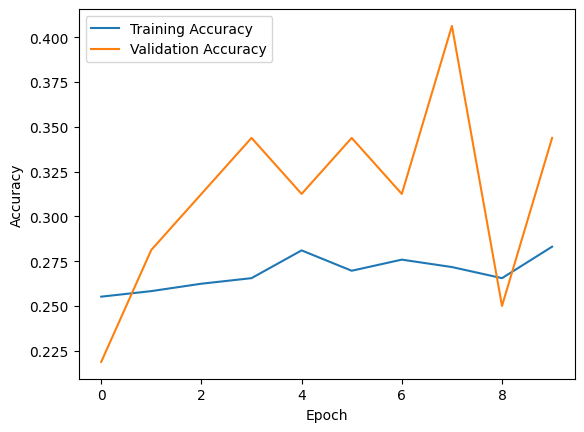

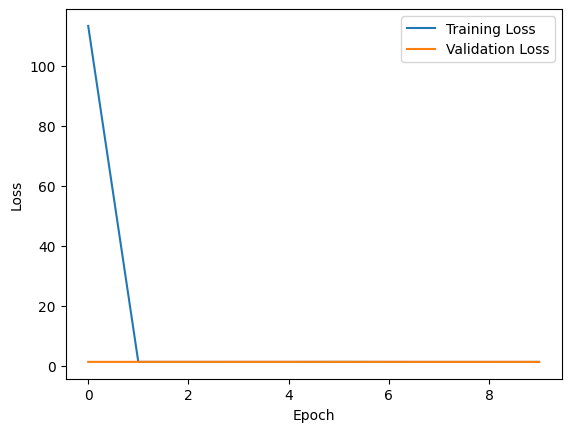

In [20]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 79ms/step


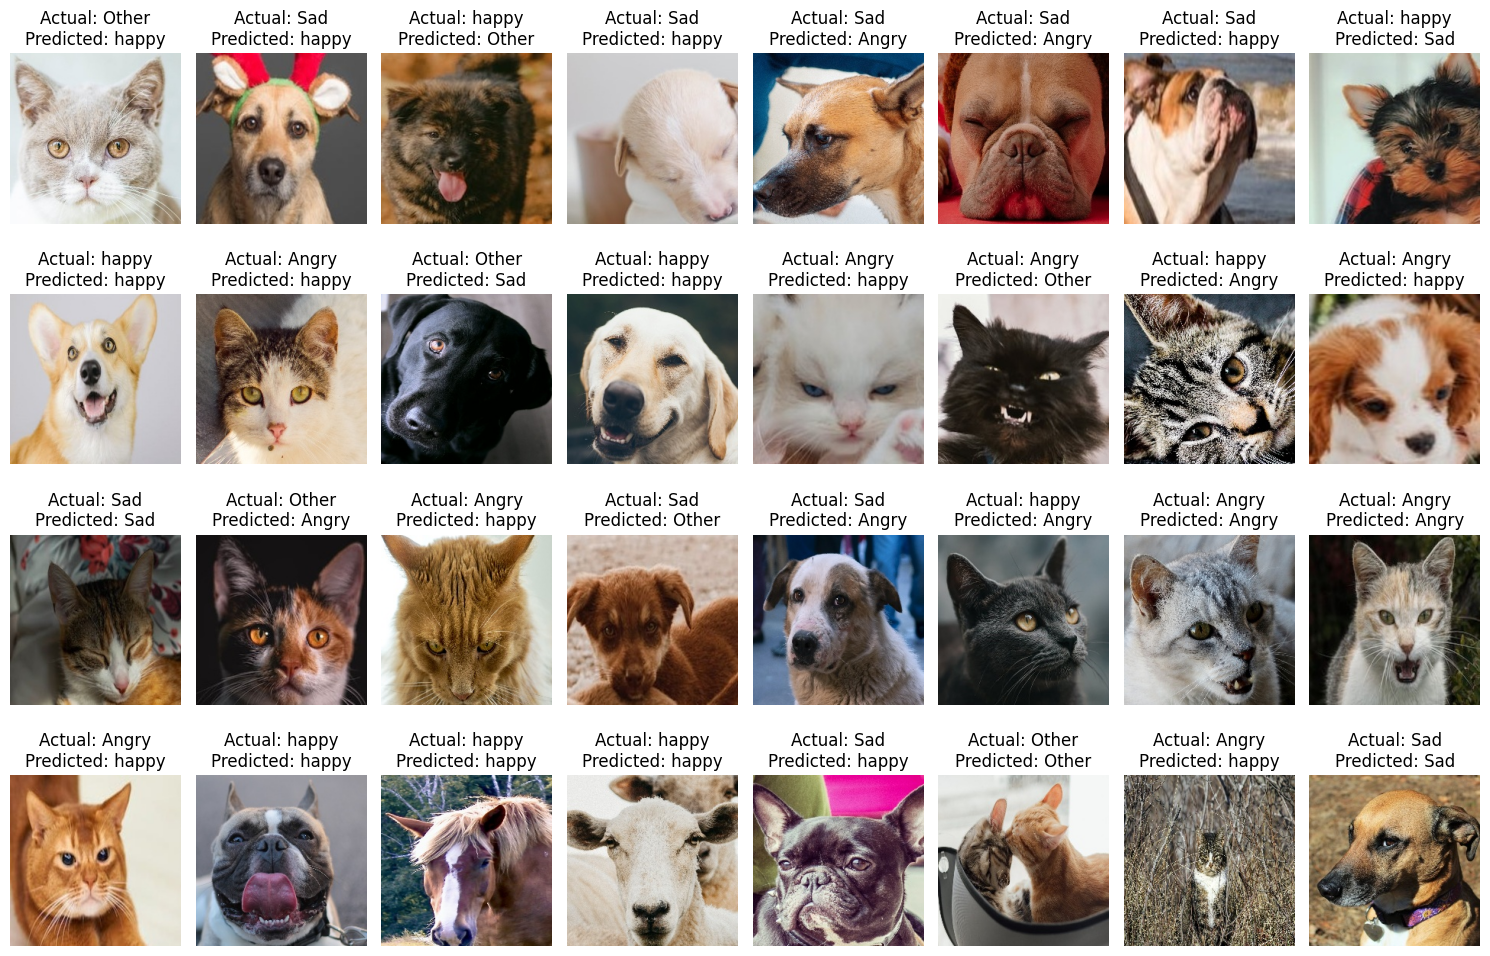

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# getting class labels and indices
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices

# getting a batch of test data and corresponding labels
test_images, test_labels = next(test_generator)

# prediciton on test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[idx] for idx in predicted_classes]

# plotting the actual and predicted labels of the images
num_images = len(test_images)
plt.figure(figsize=(15, 10))
for i in range(num_images):
    plt.subplot(4, 8, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Actual: {class_labels[np.argmax(test_labels[i])]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()